In [1]:
import numpy as np
from skimage import io, color, img_as_float
from IPython.display import display, Image
import cv2

In [2]:
# because of the simplicity of our implementation, the input image must already be float
def julia_monochrome(rgb_image):
    # coeffs = np.array([0.2125, 0.7154, 0.0721], dtype=rgb.dtype) - this is Python standard
    coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype)
    return rgb_image @ coeffs

In [15]:
slide = io.imread("hand-crafted-dmm.png")
slide_float = img_as_float(slide)
slide_no_alpha = slide_float[:,:,:3]
s = julia_monochrome(slide_no_alpha)

In [4]:
slide_float.shape

(540, 846, 4)

In [18]:
slide_no_alpha.shape

(540, 846, 3)

In [19]:
def save_show(monochrome_image, file_name):
    monochrome_image_uint8 = (monochrome_image * 255).astype(np.uint8)
    cv2.imwrite(file_name, monochrome_image_uint8)
    display(Image(filename=file_name))

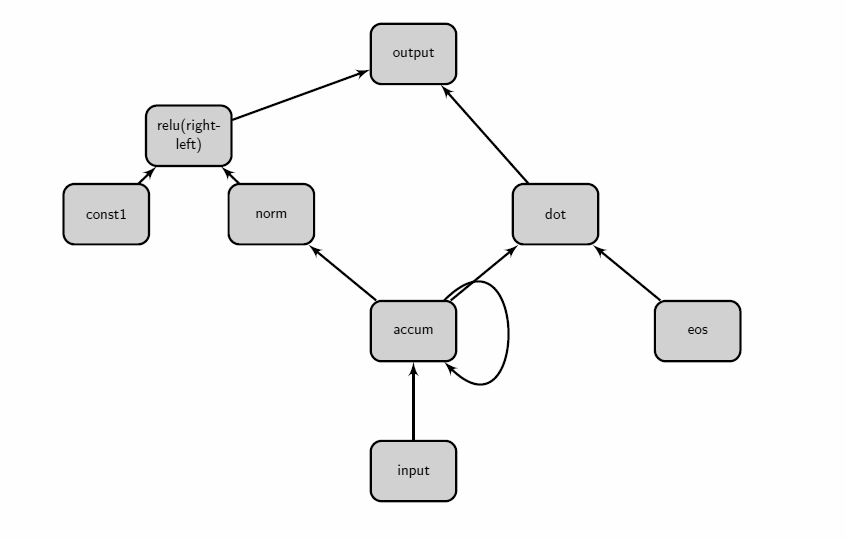

In [20]:
save_show(s, "gray_slide.png")

In [22]:
# Function to normalize an image
def normalize_image(im):
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

# Function to normalize columns
def norm_columns(f, x):
    return f(x) / np.sum(f(x), axis=0)

# Function to normalize rows
def norm_rows(f, x):
    return f(x) / np.sum(f(x), axis=1)[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c for further explanation

In [23]:
t_s_s = normalize_image(np.dot(np.transpose(s), s))

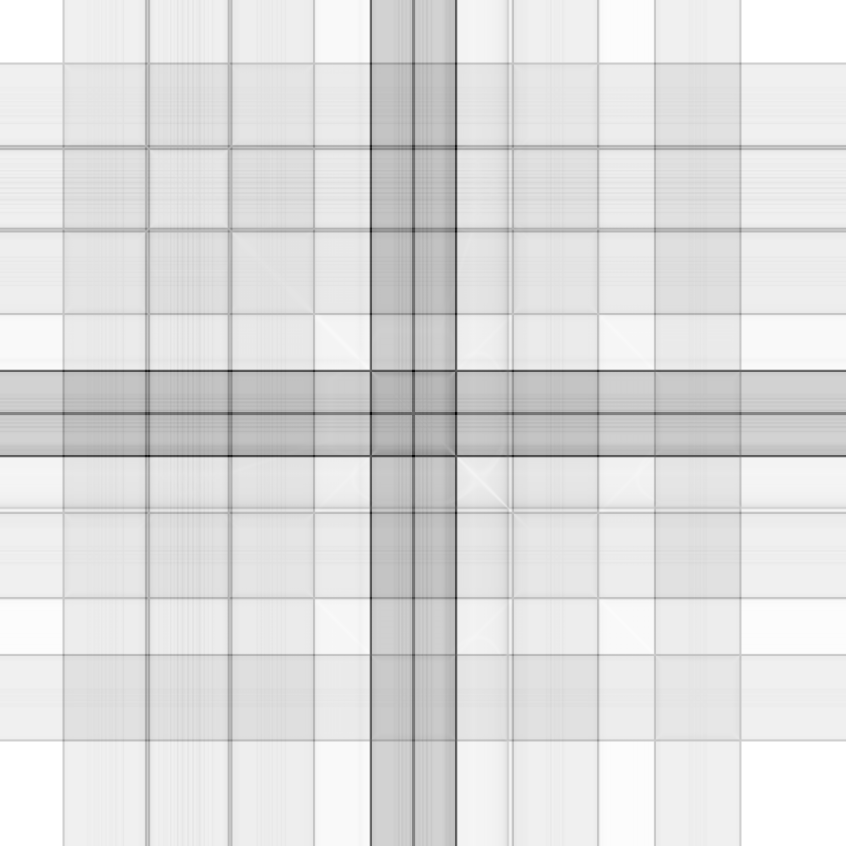

In [24]:
save_show(t_s_s, 'product_float64_t_s_s.png')

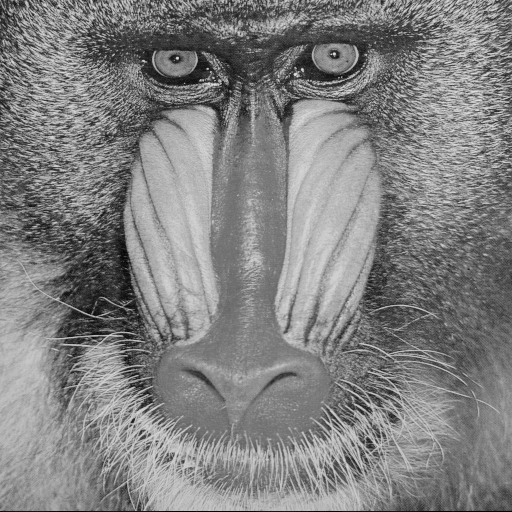

In [25]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")
mandrill_float = img_as_float(mandrill)
m = julia_monochrome(mandrill_float)
save_show(m, 'gray_mandrill.png')

In [26]:
m.shape

(512, 512)

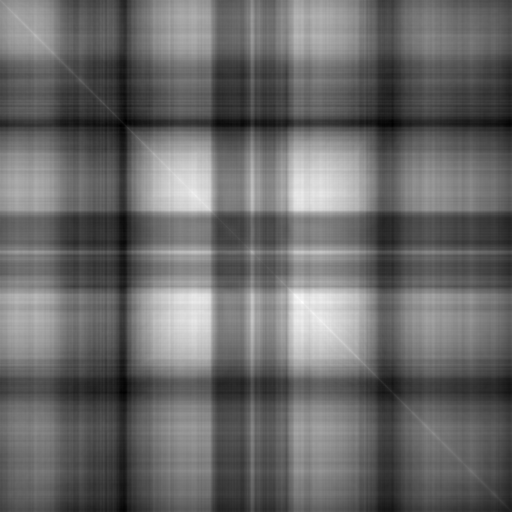

In [27]:
t_m_m = normalize_image(np.dot(np.transpose(m), m))
save_show(t_m_m, 'product_t_m_m.png')

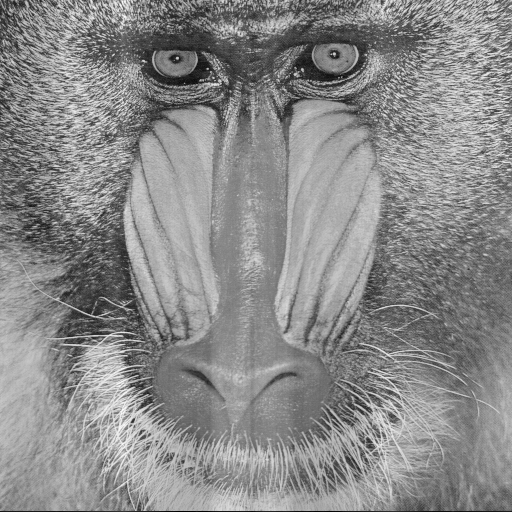

In [31]:
nc_m = normalize_image(norm_columns(lambda x: x + 1, m))
save_show(nc_m, 'nc_monkey.png')

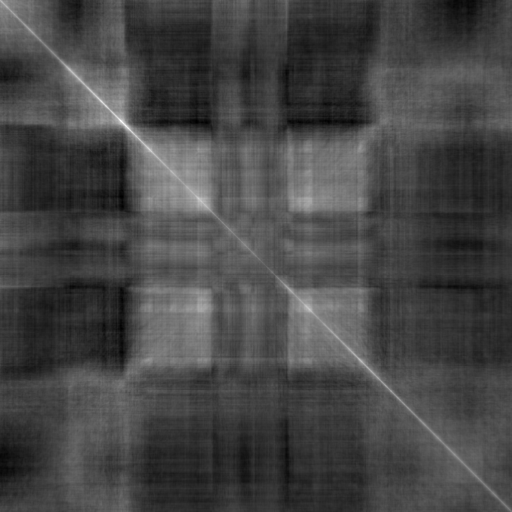

In [32]:
t_ncm_ncm = normalize_image(np.dot(np.transpose(nc_m), nc_m))
save_show(t_ncm_ncm, 'product_t_ncm_ncm.png')

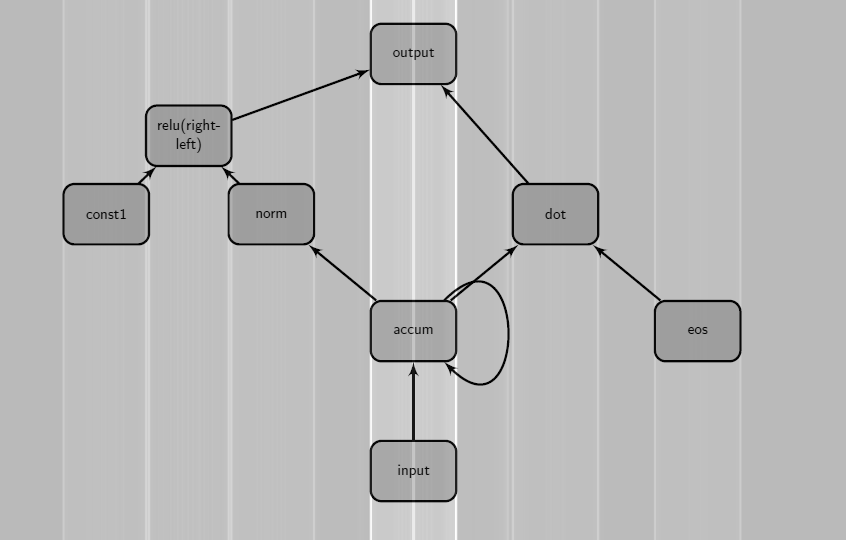

In [30]:
nc_s = normalize_image(norm_columns(lambda x: x + 1, s))
save_show(nc_s, 'nc_slides.png')

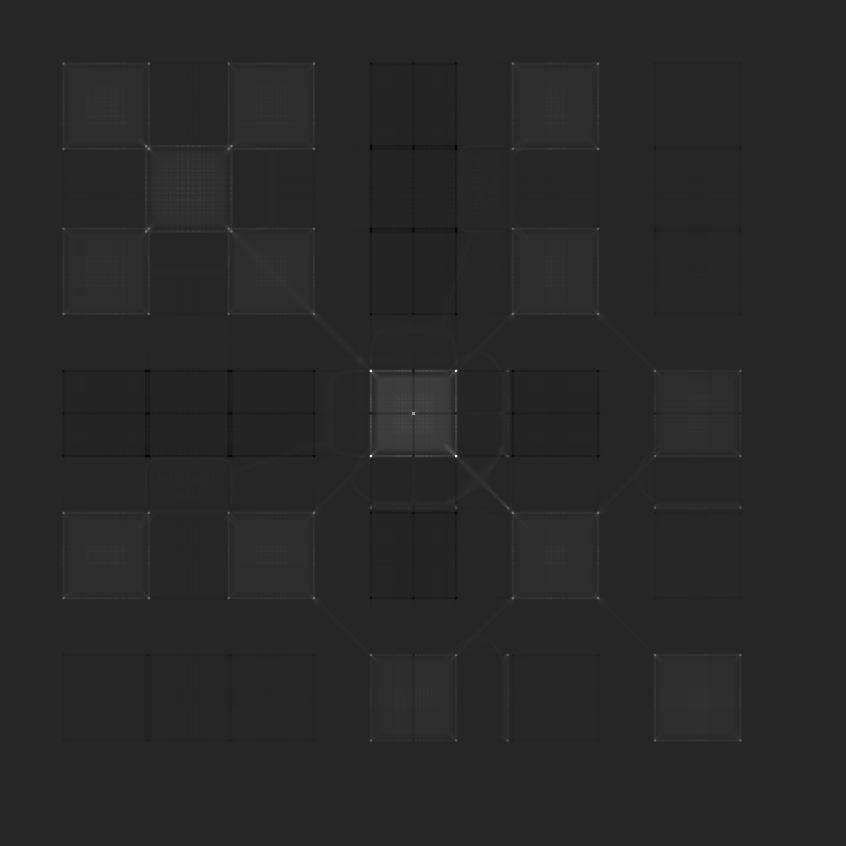

In [33]:
t_ncs_ncs = normalize_image(np.dot(np.transpose(nc_s), nc_s))
save_show(t_ncs_ncs, 'product_t_ncs_ncs.png')

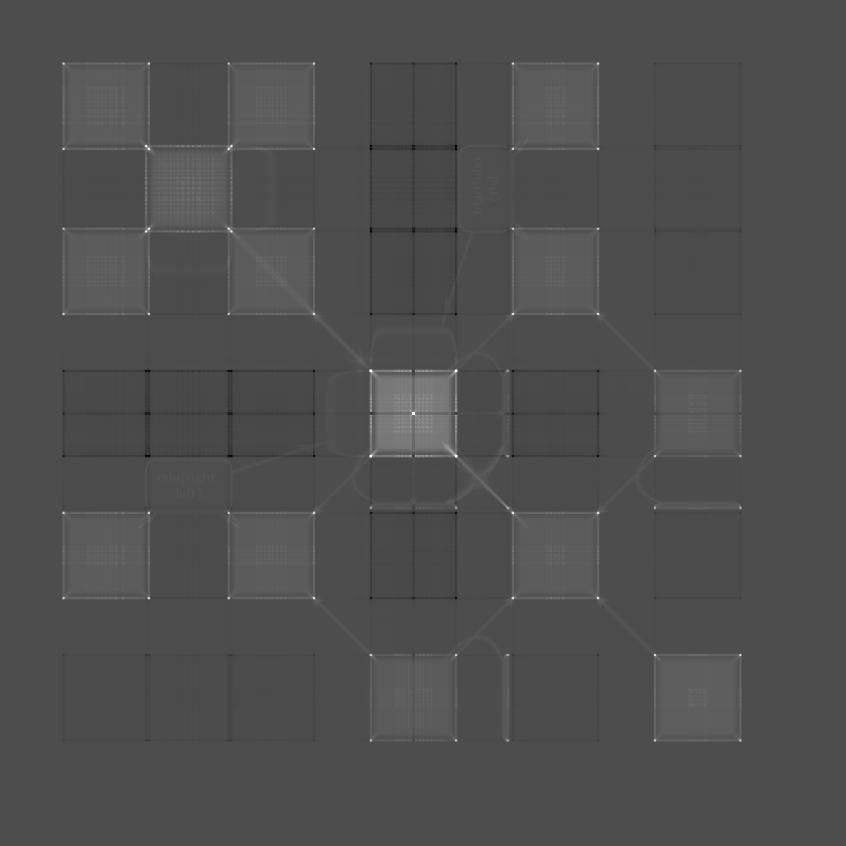

In [34]:
# let's make it a bit lighter
im_mult2 = t_ncs_ncs*2
for i in range(0, 540):
    for j in range(0, 846):
        if im_mult2[i, j] > 1.0:
            im_mult2[i, j] = 1.0
new_out = normalize_image(im_mult2)
save_show(new_out, "twice_as_lite.png")

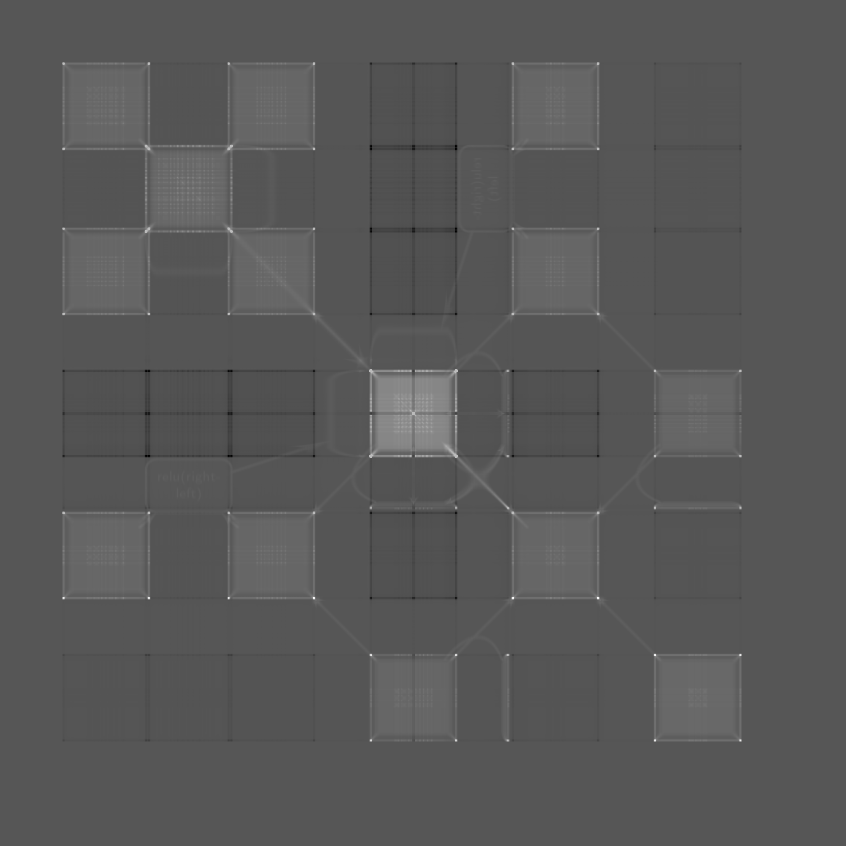

In [38]:
# let's make it a bit lighter
im_mult3 = t_ncs_ncs*3
for i in range(0, 540):
    for j in range(0, 846):
        if im_mult3[i, j] > 1.0:
            im_mult3[i, j] = 1.0
new_out_3 = normalize_image(im_mult3)
save_show(new_out_3, "3_times_as_lite.png")

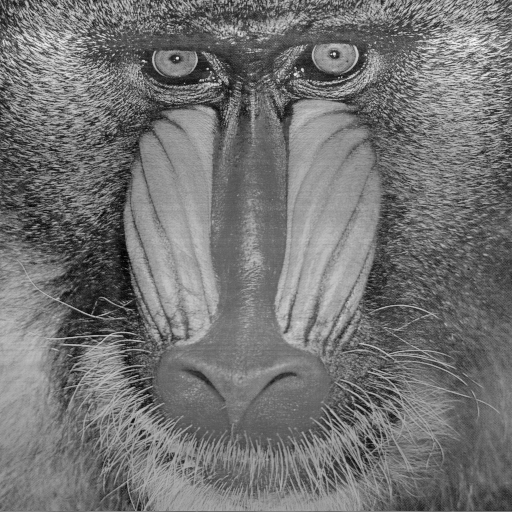

In [39]:
nr_m = normalize_image(norm_rows(lambda x: x + 1, m))
save_show(nr_m, 'nr_monkey.png')

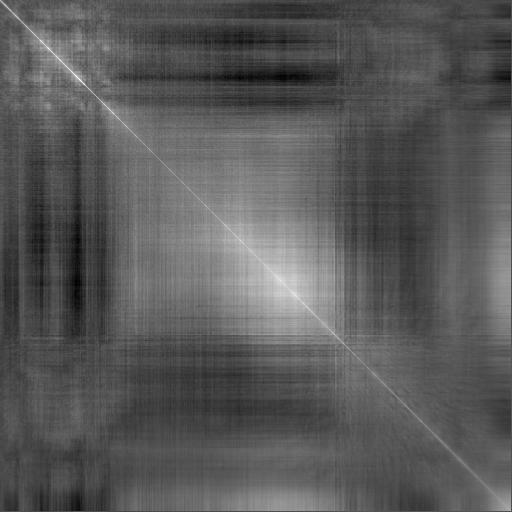

In [42]:
t_nrm_nrm = normalize_image(np.dot(nr_m, np.transpose(nr_m)))
save_show(t_nrm_nrm, 'product_t_nrm_nrm.png')

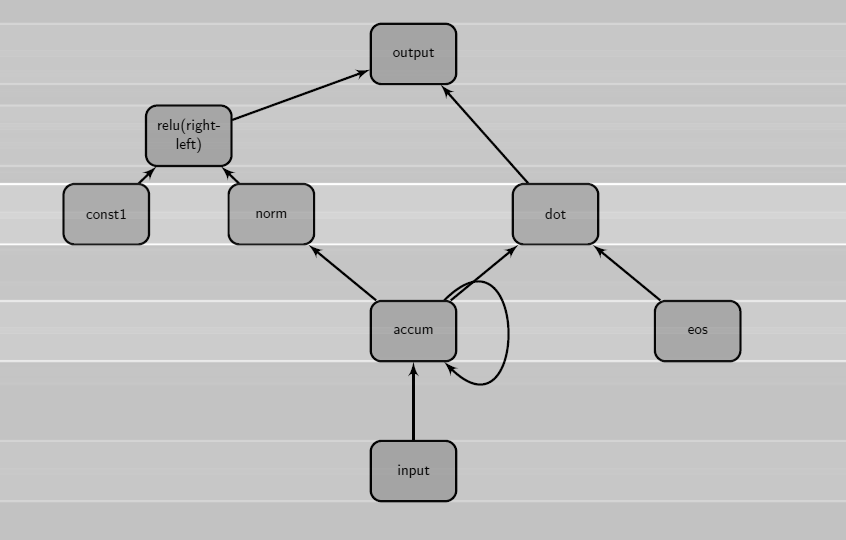

In [43]:
nr_s = normalize_image(norm_rows(lambda x: x + 1, s))
save_show(nr_s, 'nr_slides.png')

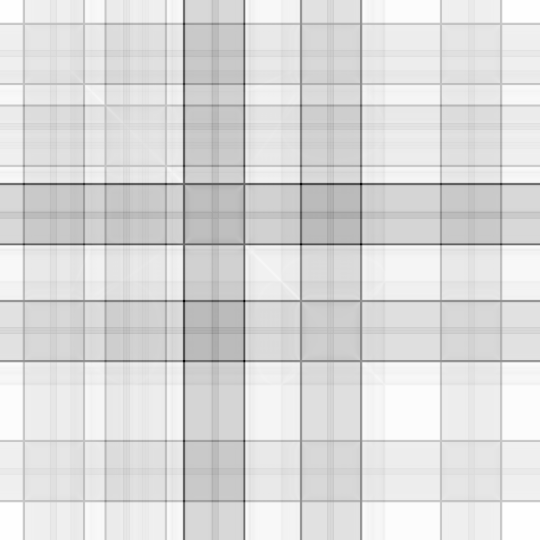

In [44]:
t_nrs_nrs = normalize_image(np.dot(nc_s, np.transpose(nc_s)))
save_show(t_nrs_nrs, 'product_t_nrs_nrs.png')

In [45]:
m_540 = cv2.resize(m, (540, 540))

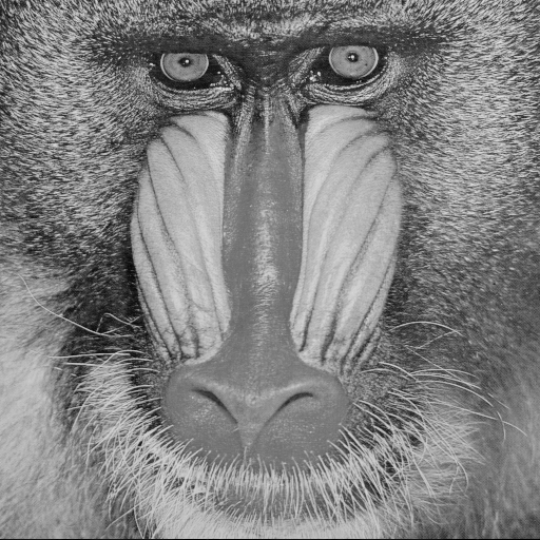

In [46]:
save_show(m_540, 'gray_mandrill_540.png')

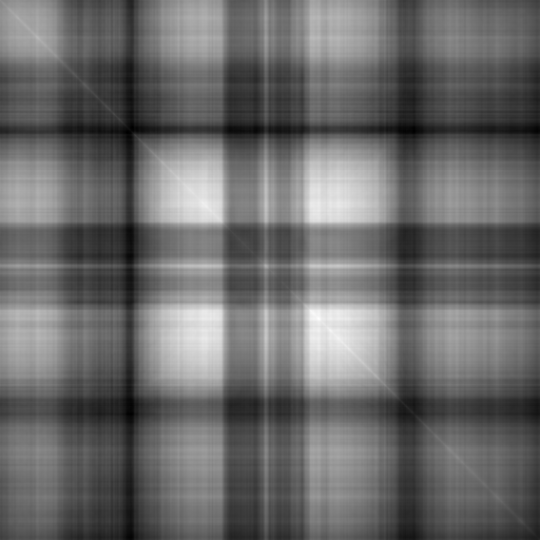

In [47]:
t_m540_m540 = normalize_image(np.dot(np.transpose(m_540), m_540))
save_show(t_m540_m540, 'product_t_m_m_540.png')

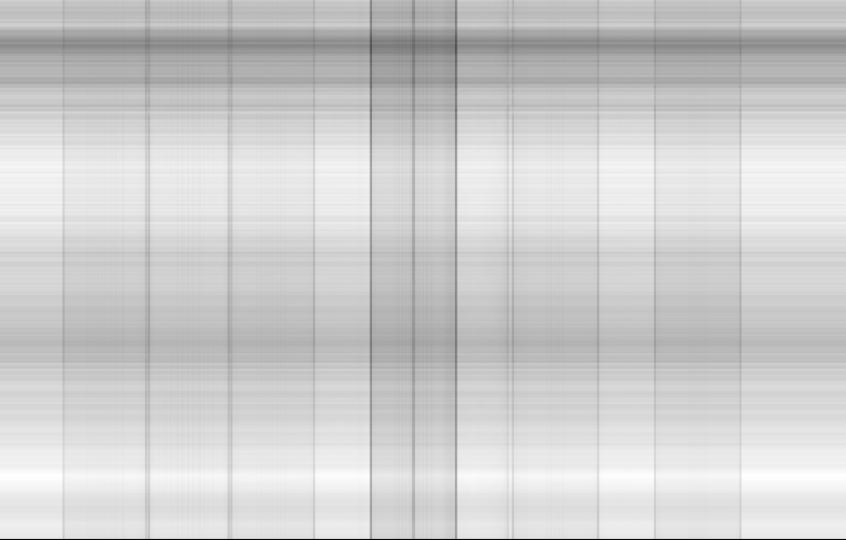

In [48]:
m_by_s = normalize_image(np.dot(m_540, s))
save_show(m_by_s, "m_by_s.png")

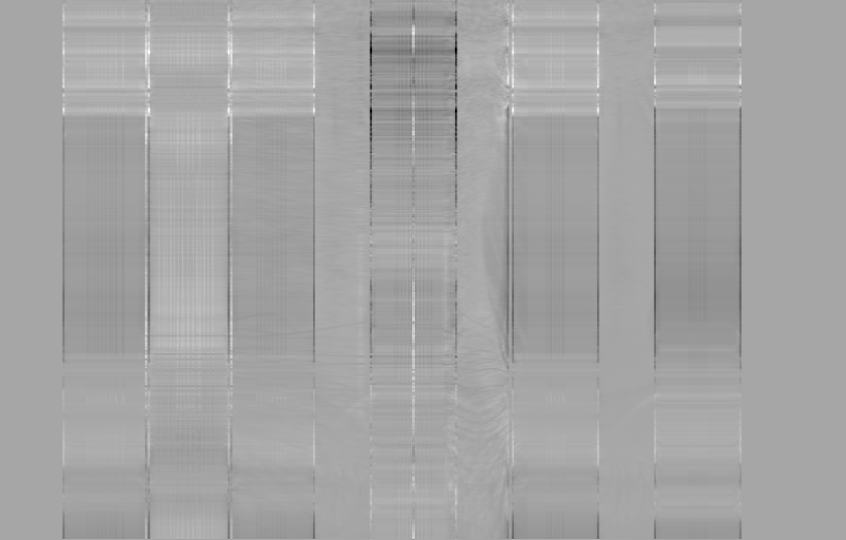

In [49]:
nr_m_540 = normalize_image(norm_rows(lambda x: x + 1, m_540))
nr_m_by_nc_s = normalize_image(np.dot(nr_m_540, nc_s))
save_show(nr_m_by_nc_s, "nrm_by_ncs.png")